In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
path=r"G:\Cynaptics\Document_Summarizer\eng_texts\jeff103.pdf"

In [3]:
!pip install pymupdf

In [4]:
import fitz

In [5]:
doc = fitz.open(path)
len(doc)

16

In [6]:
for page_number in range(len(doc)):
    page = doc.load_page(page_number)  # Load page
    text = page.get_text()  # Extract text
    print(f"Page {page_number + 1}\n{text}\n")

Page 1
BEFORE YOU READ
Since the earliest times, humans have dreamt of conquering the
skies. Here are two stories about flying.
I. A young seagull is afraid to fly. How does he conquer his fear?
II. A pilot is lost in storm clouds. Does he arrive safe? Who helps
him?
I
His First Flight
THE young seagull was alone on his ledge. His two
brothers and his sister had already flown away the
day before. He had been afraid to fly with them.
Somehow when he had taken a little run forward to
the brink of the ledge and attempted to flap his
wings he became afraid. The great expanse of sea
stretched down beneath, and it was such a long
way down — miles down. He felt certain that his
wings would never support him; so he bent his head
and ran away back to the little hole under the ledge
where he slept at night. Even when each of his
brothers and his little sister, whose wings were far
shorter than his own, ran to the brink, flapped their
wings, and flew away, he failed to muster up courage
to take t

In [7]:
import fitz  # PyMuPDF
from PIL import Image
from io import BytesIO

# Open the PDF file
pdf_document = path
doc = fitz.open(pdf_document)

# Iterate over each page
for page_number in range(len(doc)):
    page = doc.load_page(page_number)  # Load page
    image_list = page.get_images(full=True)  # Get list of images on the page

    for img_index, img in enumerate(image_list):
        xref = img[0]  # The XREF of the image
        base_image = doc.extract_image(xref)  # Extract the image bytes
        image_bytes = base_image["image"]

        # Open image with PIL and display it
        image = Image.open(BytesIO(image_bytes))
        #image.show(title=f"Page {page_number + 1} - Image {img_index + 1}")

        # Optionally, save the image to a file
        image_filename = f"page_{page_number + 1}_image_{img_index + 1}.png"
        image.save(image_filename)
        print(f"Saved {image_filename}")


Saved page_1_image_1.png
Saved page_1_image_2.png
Saved page_1_image_3.png
Saved page_1_image_4.png
Saved page_2_image_1.png
Saved page_2_image_2.png
Saved page_2_image_3.png
Saved page_2_image_4.png
Saved page_3_image_1.png
Saved page_3_image_2.png
Saved page_3_image_3.png
Saved page_3_image_4.png
Saved page_4_image_1.png
Saved page_4_image_2.png
Saved page_4_image_3.png
Saved page_5_image_1.png
Saved page_5_image_2.png
Saved page_5_image_3.png
Saved page_5_image_4.png
Saved page_5_image_5.png
Saved page_5_image_6.png
Saved page_6_image_1.png
Saved page_6_image_2.png
Saved page_6_image_3.png
Saved page_7_image_1.png
Saved page_7_image_2.png
Saved page_7_image_3.png
Saved page_7_image_4.png
Saved page_8_image_1.png
Saved page_8_image_2.png
Saved page_8_image_3.png
Saved page_8_image_4.png
Saved page_9_image_1.png
Saved page_9_image_2.png
Saved page_9_image_3.png
Saved page_9_image_4.png
Saved page_9_image_5.png
Saved page_10_image_1.png
Saved page_10_image_2.png
Saved page_10_image_3.p

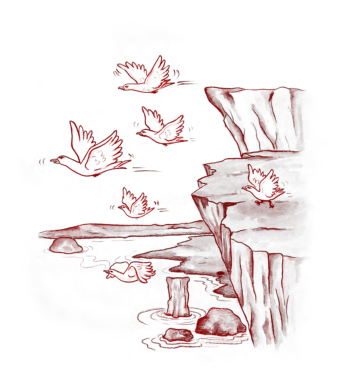

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the PNG image using PIL
image = Image.open(r'G:\Cynaptics\Document_Summarizer\page_2_image_1.png')

# Display using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [10]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image

# Step 1: Load the BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Step 2: Load and preprocess the image
image_path = "G:\Cynaptics\Document_Summarizer\page_2_image_1.png"  # Replace with the path to your image
image = Image.open(image_path)
inputs = processor(images=image, return_tensors="pt")

# Step 3: Generate the caption
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)

# Step 4: Print the generated caption
print("Generated caption:", caption)

c:\Users\aruna\anaconda3\envs\pytorchgpu\lib\site-packages\transformers\generation\utils.py:1248: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated caption: a red painting of a waterfall with water and leaves


In [12]:
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

# Step 1: Load the BLIP-2 model and processor
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")

# Step 2: Load and preprocess your own image (local file path)
image_path = 'G:\Cynaptics\Document_Summarizer\page_2_image_1.png'  # Adjust this to your local file path
raw_image = Image.open(image_path).convert('RGB')

# Step 3: Prepare inputs for the model (without a question)
inputs = processor(raw_image, return_tensors="pt")

# Step 4: Generate caption
output = model.generate(**inputs)

# Step 5: Decode and print the generated caption
generated_caption = processor.decode(output[0], skip_special_tokens=True).strip()
print("Generated Caption:", generated_caption)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Generated Caption: a red painting of birds flying over a cliff


In [16]:
import pytesseract
from PIL import Image

# Load an image using PIL (Python Imaging Library)
image = Image.open('G:\Cynaptics\Document_Summarizer\page_2_image_1.png')

# Use pytesseract to do OCR on the image
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:


# Path to your PDF file
pdf_document = "/kaggle/input/pdffff/BSE102_Lecture 3_Chemical basis of life.pdf"

# Open the PDF file
doc = fitz.open(pdf_document)

# Dictionary to store text for each page
page_text_dict = {}

# Iterate over each page
for page_number in range(len(doc)):
    page = doc.load_page(page_number)  # Load page
    image_list = page.get_images(full=True)  # Get list of images on the page
    
    # Extract existing text from the page
    page_text = page.get_text()
    
    # Initialize text storage for this page
    page_text_combined = page_text
    
    # Iterate over each image on the page
    for img_index, img in enumerate(image_list):
        xref = img[0]  # The XREF of the image
        base_image = doc.extract_image(xref)  # Extract the image bytes
        image_bytes = base_image["image"]

        # Open image with PIL
        image = Image.open(BytesIO(image_bytes)).convert('RGB')
        
        # Step 2: Generate caption using BLIP-2
        inputs = processor(image, return_tensors="pt")
        output = model.generate(**inputs)
        generated_caption = processor.decode(output[0], skip_special_tokens=True).strip()
        
        # Step 3: Perform OCR using Tesseract
        text = pytesseract.image_to_string(image).strip()
        
        # Combine caption and OCR text
        combined_text = f"\n\nImage {img_index + 1}:\nCaption: {generated_caption}\nExtracted Text:\n{text}\n"
        
        # Append the combined text to the page text
        page_text_combined += combined_text
    
    # Store the combined text for this page
    page_text_dict[page_number + 1] = page_text_combined

# Save the combined text for all pages into a single document
output_file = "output_text.txt"
with open(output_file, "w") as f:
    for page_number, page_text in page_text_dict.items():
        f.write(f"Page {page_number}\n{'='*40}\n{page_text}\n\n")
        
print(f"Saved combined text to {output_file}")


In [ ]:
pdf_document = "/kaggle/input/pdffff/BSE102_Lecture 3_Chemical basis of life.pdf"

# Open the PDF file
doc = fitz.open(pdf_document)

page_text_list = []
for page_number in range(len(doc)):
    page = doc.load_page(page_number)  # Load page
    image_list = page.get_images(full=True)  # Get list of images on the page
    
    # Extract existing text from the page
    page_text = page.get_text()
    
    # Initialize text storage for this page
    page_text_combined = page_text
    
    # Iterate over each image on the page
    for img_index, img in enumerate(image_list):
        xref = img[0]  # The XREF of the image
        base_image = doc.extract_image(xref)  # Extract the image bytes
        image_bytes = base_image["image"]

        # Open image with PIL
        image = Image.open(BytesIO(image_bytes)).convert('RGB')
        
        # Step 2: Generate caption using BLIP-2
        inputs = processor(image, return_tensors="pt")
        output = model.generate(**inputs)
        generated_caption = processor.decode(output[0], skip_special_tokens=True).strip()
        
        # Step 3: Perform OCR using Tesseract
        text = pytesseract.image_to_string(image).strip()
        
        # Combine caption and OCR text
        combined_text = f"\n\nImage {img_index + 1}:\nCaption: {generated_caption}\nExtracted Text:\n{text}\n"
        
        # Append the combined text to the page text
        page_text_combined += combined_text
    
    # Store the combined text for this page in the list
    page_text_list.append(page_text_combined)

# Print the combined text for each page
for page_number, page_text in enumerate(page_text_list, start=1):
    print(f"Page {page_number}\n{'='*40}\n{page_text}\n\n")

NameError: name 'doc' is not defined

In [ ]:
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
import string
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Sentence tokenization
    sentences = sent_tokenize(text)
    
    # Lowercasing and removing punctuation
    sentences_cleaned = []
    for sentence in sentences:
        sentence = sentence.lower()
        sentence = re.sub(r'[' + string.punctuation + ']', '', sentence)  # Remove punctuation
        sentences_cleaned.append(sentence)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    sentences_filtered = []
    for sentence in sentences_cleaned:
        words = sentence.split()
        words_filtered = [word for word in words if word not in stop_words]
        sentences_filtered.append(' '.join(words_filtered))
    
    # Join sentences back into a single text
    preprocessed_text = ' '.join(sentences_filtered)
    
    return preprocessed_text

# Example usage:
for page_number, page_text in enumerate(page_text_list, start=1):
    print(f"Original Page {page_number} Text:")
    print(page_text)
    
    # Preprocess the text
    preprocessed_text = preprocess_text(page_text)
    
    print(f"\nPreprocessed Page {page_number} Text:")
    print(preprocessed_text)
    print("\n")
